### DEPENDENCIES

In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

### IMPORT CSV

In [2]:
#load assesment file
amzn = "resources/HistoricalData_amzn.csv"
amzn_df = pd.read_csv(amzn)
amzn_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$3244.99,2422813,$3215.5,$3257.95,$3210.4993
1,05/21/2021,$3203.08,4104882,$3250,$3256.6946,$3197.01
2,05/20/2021,$3247.68,2633192,$3244.4042,$3259.6799,$3236.18
3,05/19/2021,$3231.8,2679708,$3195,$3234.75,$3184
4,05/18/2021,$3232.28,2828391,$3292.575,$3312,$3230.37


### CLEAN, RESHAPE AND CONVERT DATATYPE

In [3]:
amzn_df['Date']= pd.to_datetime(amzn_df['Date'])
amzn_df['Close/Last'] = amzn_df['Close/Last'].str.replace('$','')
amzn_df['Open'] = amzn_df['Open'].str.replace('$','')
amzn_df['High'] = amzn_df['High'].str.replace('$','')
amzn_df['Low'] = amzn_df['Low'].str.replace('$','')
amzn_df = amzn_df.apply( pd.to_numeric)

### FORMAT DATE COLUMN

In [4]:
amzn_df['Date']= pd.to_datetime(amzn_df['Date'])
amzn_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,3244.99,2422813,3215.5000,3257.9500,3210.4993
1,2021-05-21,3203.08,4104882,3250.0000,3256.6946,3197.0100
2,2021-05-20,3247.68,2633192,3244.4042,3259.6799,3236.1800
3,2021-05-19,3231.80,2679708,3195.0000,3234.7500,3184.0000
4,2021-05-18,3232.28,2828391,3292.5750,3312.0000,3230.3700


### SPLIT DATAFRAME

In [5]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = amzn_df["Date"] >= start_date
before_end_date = amzn_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
amzn_df_4 = amzn_df.loc[between_two_dates]
amzn_df_4.head()

,Date,Close/Last,Volume,Open,High,Low
252,2020-05-22,2436.88,2867079,2455.010,2469.850,2430.13
253,2020-05-21,2446.74,5114403,2500.000,2525.450,2442.54
254,2020-05-20,2497.94,3998143,2477.870,2500.010,2467.27
255,2020-05-19,2449.33,4320498,2429.830,2484.995,2428.97
256,2020-05-18,2426.26,4366572,2404.346,2433.000,2384.01


### SPLIT DATAFRAME

In [6]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = amzn_df["Date"] >= start_date
before_end_date = amzn_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
amzn_df_ls = amzn_df.loc[between_two_dates]
amzn_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,3244.99,2422813,3215.5000,3257.9500,3210.4993
1,2021-05-21,3203.08,4104882,3250.0000,3256.6946,3197.0100
2,2021-05-20,3247.68,2633192,3244.4042,3259.6799,3236.1800
3,2021-05-19,3231.80,2679708,3195.0000,3234.7500,3184.0000
4,2021-05-18,3232.28,2828391,3292.5750,3312.0000,3230.3700


### PLOT FIRST DF (4YEARS)

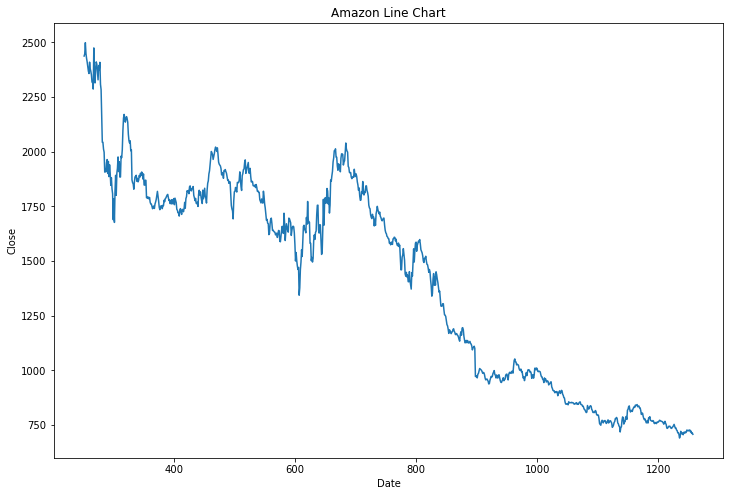

In [7]:
plt.figure(figsize=(12,8))
plt.plot(amzn_df_4['Close/Last'])
plt.title("Amazon Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

### PLOT SECOND DF (LAST YEAR)

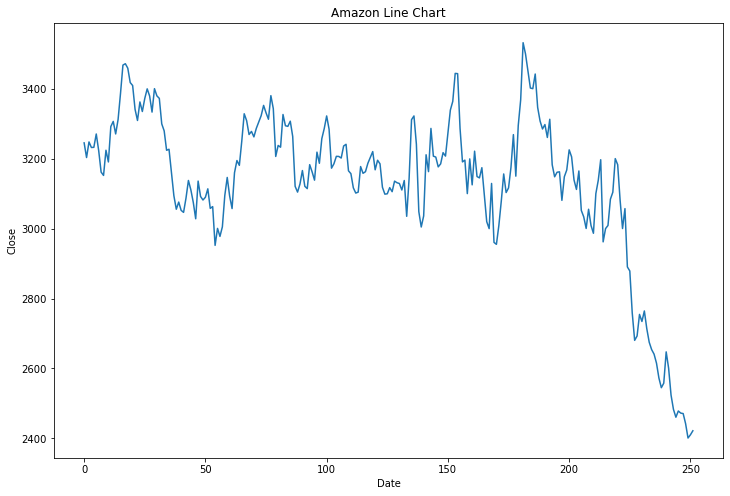

In [8]:
plt.figure(figsize=(12,8))
plt.plot(amzn_df_ls['Close/Last'])
plt.title("Amazon Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

### SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [9]:
amzn_df_4.shape

(1006, 6)

In [10]:
X = np.array(amzn_df_4['Open']).reshape(1006,-1)
Y = np.array(amzn_df_4['Close/Last']).reshape(1006,-1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X, Y)

LinearRegression()

In [14]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [1.04509618]
coefficient count: 1


In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.997639655281388


In [16]:
# Predicting the price
lr.predict(X)

array([[2454.0775244 ],
       [2499.03128384],
       [2476.9191101 ],
       ...,
       [ 715.46914585],
       [ 708.8045187 ],
       [ 708.47478453]])

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

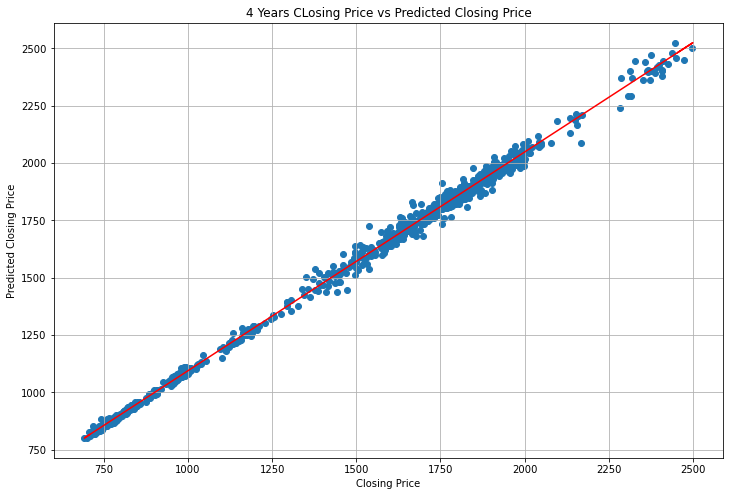

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(amzn_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/amzn_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

### TRAINING, TESTING ML ON 2ND DF

In [18]:
amzn_df_ls.shape

(252, 6)

In [19]:
X_ls = np.array(amzn_df_ls['Open']).reshape(252,-1)
Y_ls = np.array(amzn_df_ls['Close/Last']).reshape(252,-1)

In [20]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [21]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [140.10738856]
coefficient count: 1


In [22]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9476066909501086


In [23]:
# Predicting the price
lr.predict(X_ls)

array([[3207.79550782],
       [3240.70959276],
       [3235.37102359],
       [3188.23786315],
       [3281.32748163],
       [3236.82668477],
       [3179.23180629],
       [3179.14594346],
       [3178.69754868],
       [3132.21713656],
       [3271.54388914],
       [3306.62362546],
       [3259.79022171],
       [3325.48005702],
       [3342.01819216],
       [3464.64939442],
       [3503.18272458],
       [3484.08110694],
       [3417.01460425],
       [3425.2860569 ],
       [3334.20467461],
       [3306.63316578],
       [3356.79613928],
       [3303.67566829],
       [3358.62787966],
       [3374.58882578],
       [3364.73368093],
       [3356.1473979 ],
       [3387.66859692],
       [3384.62046645],
       [3341.08324135],
       [3292.89511293],
       [3298.81010791],
       [3225.25428331],
       [3215.66626726],
       [3167.24917131],
       [3114.72019981],
       [3063.31698542],
       [3068.99347253],
       [3055.09228031],
       [3044.23635647],
       [3071.836

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

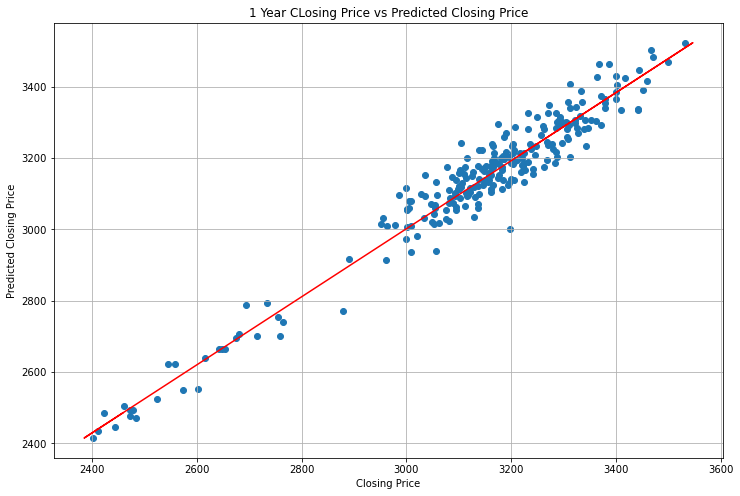

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(amzn_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/amzn_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')

### MODEL COMPARISON

<tr>
    <td> <img src="images/amzn_4y.jpg"style="width: 550px;"/> </td>
    <td> <img src="images/amzn_ls.jpg"style="width: 550px;"/> </td>
</tr>
